# Data Preparing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv('dataset/SalesKaggle3.csv')

In [3]:
df.head()

,Order,File_Type,SKU_number,SoldFlag,SoldCount,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice
0,2,Historical,1737127,0.0,0.0,D,15,1,682743.0,44.99,2015,8,28.97,31.84
1,3,Historical,3255963,0.0,0.0,D,7,1,1016014.0,24.81,2005,39,0.00,15.54
2,4,Historical,612701,0.0,0.0,D,0,0,340464.0,46.00,2013,34,30.19,27.97
3,6,Historical,115883,1.0,1.0,D,4,1,334011.0,100.00,2006,20,133.93,83.15
4,7,Historical,863939,1.0,1.0,D,2,1,1287938.0,121.95,2010,28,4.00,23.99


In [4]:
# take a subset of the data
df_sub = df[['SKU_number','PriceReg','ItemCount','File_Type']][(df['File_Type']) == 'Historical']

In [5]:
df_sub.head()

,SKU_number,PriceReg,ItemCount,File_Type
0,1737127,44.99,8,Historical
1,3255963,24.81,39,Historical
2,612701,46.00,34,Historical
3,115883,100.00,20,Historical
4,863939,121.95,28,Historical


In [6]:
df_sub.shape

(75996, 4)

In [7]:
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75996 entries, 0 to 75995
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SKU_number  75996 non-null  int64  
 1   PriceReg    75996 non-null  float64
 2   ItemCount   75996 non-null  int64  
 3   File_Type   75996 non-null  object 
dtypes: float64(1), int64(2), object(1)
memory usage: 2.9+ MB


In [8]:
df_sub.duplicated().sum()

0

# Product Analysis (1st method)

In [9]:
# create 3 grades A,B,C based on the running percentage (A-60%,B-25%,C-15%)
def ABC_segmentation(RunPerc):
    if RunPerc > 0 and RunPerc < 0.6:
        return 'A'
    elif RunPerc >=0.6 and RunPerc < 0.85:
        return 'B'
    elif RunPerc >=0.85:
        return 'C'

In [10]:
# create the column of the additive cost per SKU
df_sub['AddCost'] = df_sub['PriceReg'] * df_sub['ItemCount']

In [11]:
# order by AddCost
df_sub = df_sub.sort_values(by=['AddCost'], ascending=False)

In [12]:
# create the column of the running CumCost of the cumulative cost per SKU
df_sub['RunCumCost'] = df_sub['AddCost'].cumsum()

In [13]:
# create the column of the total sum
df_sub['TotSum'] = df_sub['AddCost'].sum()

In [14]:
# create the column of the running percentage 
df_sub['RunPerc'] = df_sub['RunCumCost'] / df_sub['TotSum']

In [15]:
# create the column of the class
df_sub['Class'] = df_sub['RunPerc'].apply(ABC_segmentation)

In [16]:
df_sub

,SKU_number,PriceReg,ItemCount,File_Type,AddCost,RunCumCost,TotSum,RunPerc,Class
685,145889,244.6,851,Historical,208154.6,2.081546e+05,3.426320e+08,0.000608,A
601,435034,281.8,616,Historical,173588.8,3.817434e+05,3.426320e+08,0.001114,A
75056,538479,2645.3,49,Historical,129619.7,5.113631e+05,3.426320e+08,0.001492,A
5752,212633,235.6,521,Historical,122747.6,6.341107e+05,3.426320e+08,0.001851,A
3758,212480,208.8,579,Historical,120895.2,7.550059e+05,3.426320e+08,0.002204,A
...,...,...,...,...,...,...,...,...,...
4214,494166,0.0,7,Historical,0.0,3.426320e+08,3.426320e+08,1.000000,C
57965,1758095,0.0,8,Historical,0.0,3.426320e+08,3.426320e+08,1.000000,C
40803,744731,0.0,0,Historical,0.0,3.426320e+08,3.426320e+08,1.000000,C
40847,878815,0.0,29,Historical,0.0,3.426320e+08,3.426320e+08,1.000000,C


In [17]:
# total SKUs for each class
df_sub.Class.value_counts()

C    37413
B    22288
A    16295
Name: Class, dtype: int64

In [18]:
# total cost per class
print('Cost of Class A:', df_sub[df_sub.Class == 'A']['AddCost'].sum())
print('Cost of Class B:', df_sub[df_sub.Class == 'B']['AddCost'].sum())
print('Cost of Class C:', df_sub[df_sub.Class == 'C']['AddCost'].sum())

Cost of Class A: 205577451.4
Cost of Class B: 85658215.25999999
Cost of Class C: 51396361.129999995


In [19]:
# percent of total cost per class
print('Percent of Cost of A:',df_sub[df_sub.Class == 'A']['AddCost'].sum()/df_sub['AddCost'].sum())
print('Percent of Cost of B:',df_sub[df_sub.Class == 'B']['AddCost'].sum()/df_sub['AddCost'].sum())
print('Percent of Cost of C:',df_sub[df_sub.Class == 'C']['AddCost'].sum()/df_sub['AddCost'].sum())

Percent of Cost of A: 0.5999948479013728
Percent of Cost of B: 0.2500006079773141
Percent of Cost of C: 0.15000454412131298


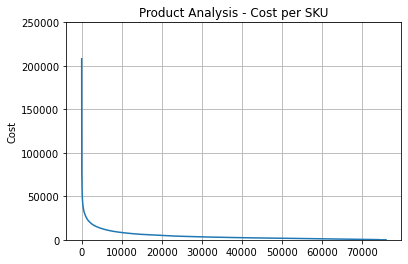

In [20]:
performance =df_sub['AddCost'].tolist()
y_pos = np.arange(len(performance))

plt.plot(y_pos, performance)
plt.ylabel('Cost')
plt.title('Product Analysis - Cost per SKU')
plt.grid(True)
plt.ylim((0,250000))
plt.show()

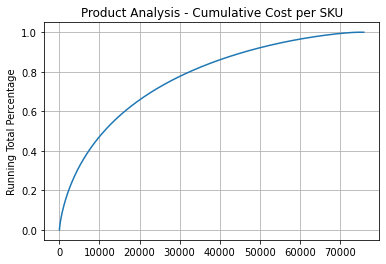

In [21]:
performance = df_sub['RunPerc'].tolist()
y_pos = np.arange(len(performance))

plt.plot(y_pos,performance)
plt.ylabel('Running Total Percentage')
plt.title('Product Analysis - Cumulative Cost per SKU')
plt.grid(True)
plt.show()

In [23]:
from abc_analysis import abc_analysis, abc_plot

In [24]:
# take a subset of the data, we need to use the price and the quantity of each item
df_sub = df[['SKU_number','PriceReg','ItemCount','File_Type']][(df['File_Type'] == 'Historical')]
# create the column of the additive cost per SKU
df_sub['AddCost'] = df['PriceReg'] * df['ItemCount']

In [25]:
df_sub

,SKU_number,PriceReg,ItemCount,File_Type,AddCost
0,1737127,44.99,8,Historical,359.92
1,3255963,24.81,39,Historical,967.59
2,612701,46.00,34,Historical,1564.00
3,115883,100.00,20,Historical,2000.00
4,863939,121.95,28,Historical,3414.60
...,...,...,...,...,...
75991,863599,64.99,34,Historical,2209.66
75992,614304,21.50,53,Historical,1139.50
75993,109021,142.75,19,Historical,2712.25
75994,658242,50.00,21,Historical,1050.00


C:\Users\Naveen Kumar R\anaconda3\lib\site-packages\abc_analysis\abc_analysis.py:163: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y = pd.Series([0]).append(y)
C:\Users\Naveen Kumar R\anaconda3\lib\site-packages\abc_analysis\abc_analysis.py:164: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x = pd.Series([0]).append(x)


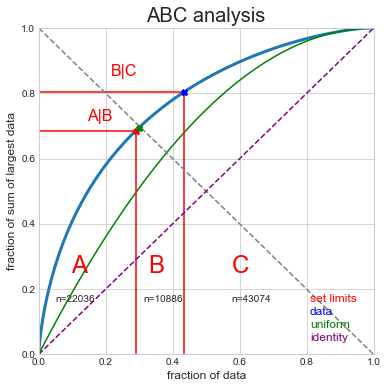

In [26]:
#Draw the ABC Product Graph
abc = abc_analysis(df_sub['AddCost'], True)

In [27]:
# idnex position of A, B, and C Segmentations
a_index = abc['Aind']
b_index = abc['Bind']
c_index = abc['Cind']

# New Column indicating A, B, or C
cond_list = [df_sub.index.isin(a_index),
             df_sub.index.isin(b_index),
             df_sub.index.isin(c_index)]

choice_list = ['A','B','C']

df_sub['abc'] = np.select(cond_list, choice_list)
df_sub.sort_values(by=['AddCost'], ascending=False)

,SKU_number,PriceReg,ItemCount,File_Type,AddCost,abc
685,145889,244.6,851,Historical,208154.6,A
601,435034,281.8,616,Historical,173588.8,A
75056,538479,2645.3,49,Historical,129619.7,A
5752,212633,235.6,521,Historical,122747.6,A
3758,212480,208.8,579,Historical,120895.2,A
...,...,...,...,...,...,...
4214,494166,0.0,7,Historical,0.0,C
57965,1758095,0.0,8,Historical,0.0,C
40803,744731,0.0,0,Historical,0.0,C
40847,878815,0.0,29,Historical,0.0,C


In [28]:
df_sub['abc'].value_counts()

C    43074
A    22036
B    10886
Name: abc, dtype: int64